In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
plt.style.use('fivethirtyeight')

In [3]:
click = pd.read_excel('Click_MP_1103.xlsx')
click.head()

,SerialNumber,tDateTime,ProductName,result,FailItem,Btn1_click,Btn2_click,Btn3_click,Btn4_click,Btn5_click
0,3433927326,2022-10-28 01:05:00,"MARQ Athlete Gen 2, EMEA",1,0,0.26,0.26,0.25,0.28,0.26
1,3433927374,2022-10-28 01:05:52,"MARQ Athlete Gen 2, EMEA",1,0,0.24,0.27,0.25,0.23,0.26
2,3433927282,2022-10-28 01:06:37,"MARQ Athlete Gen 2, EMEA",1,0,0.24,0.27,0.26,0.25,0.27
3,3433927294,2022-10-28 01:07:23,"MARQ Athlete Gen 2, EMEA",1,0,0.26,0.26,0.24,0.24,0.26
4,3433927339,2022-10-28 01:09:00,"MARQ Athlete Gen 2, EMEA",1,0,0.24,0.26,0.24,0.26,0.25


In [58]:
click_dup = click[click.FailItem.isin([0,7])]
click_dup = click_dup[click_dup.duplicated(subset='SerialNumber',keep=False)].sort_values(['SerialNumber','tDateTime'])
click_dup.to_excel('click_dup.xlsx')

In [56]:
click_drop = click.drop_duplicates(subset='SerialNumber', keep='last')

Text(0.5, 1.0, 'FinalResult')

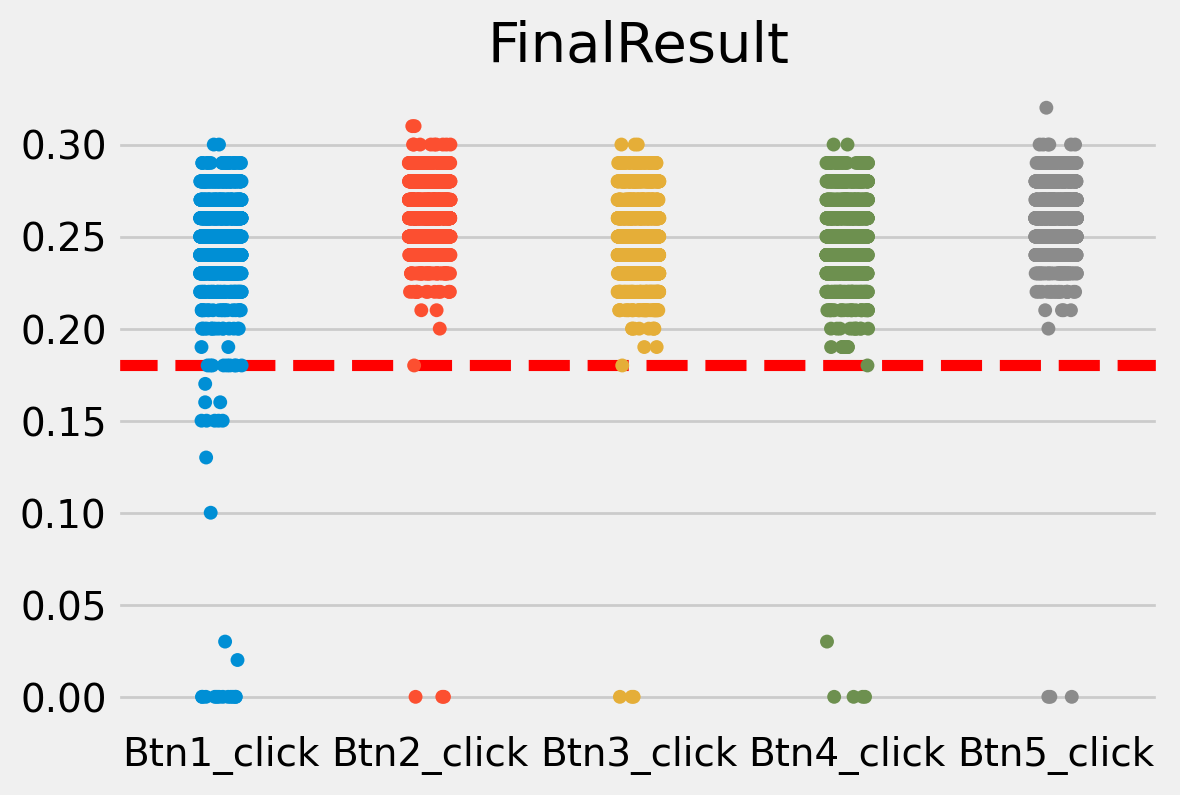

In [27]:
plt.figure(dpi=200)
sns.stripplot(data=click_drop.iloc[:,5:])
plt.axhline(0.18, color='red', ls='--')
plt.title('FinalResult')

Text(0.5, 1.0, 'Final NG counts')

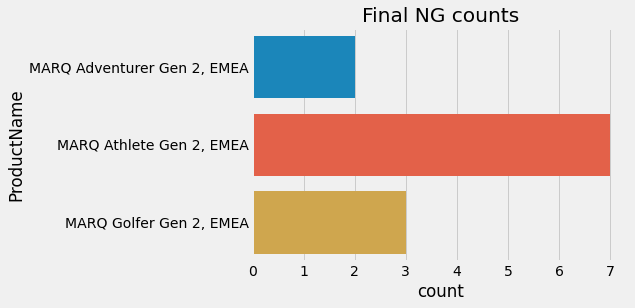

In [29]:
sns.countplot(data=click_drop[(click_drop.FailItem == 7) & (click_drop.Btn1_click>0)].sort_values('ProductName'), y='ProductName')
plt.title('Final NG counts')

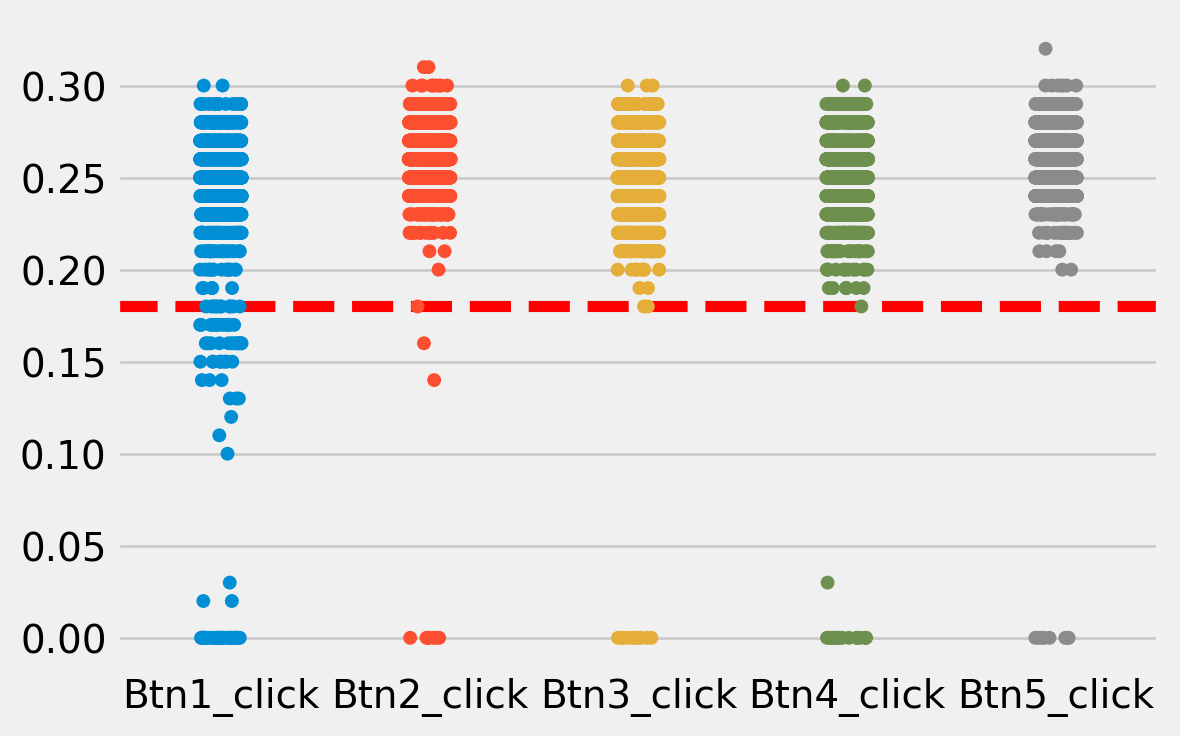

In [22]:
plt.figure(dpi=200)
sns.stripplot(data=click.iloc[:,5:])
plt.axhline(0.18, color='red', ls='--')

<AxesSubplot:xlabel='count', ylabel='ProductName'>

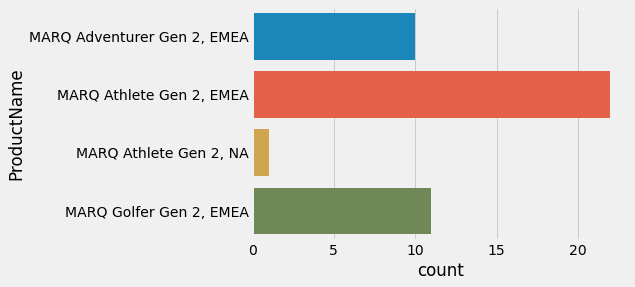

In [21]:
sns.countplot(data=click[(click.FailItem == 7) & (click.Btn1_click>0)].sort_values('ProductName'), y='ProductName')